In [1]:
import numpy as np
import matplotlib.pyplot as plt
from interp import Lagrang
from scipy.interpolate import lagrange

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 3.2 Polinomio de Lagrange

### 3.2.1 Explicación

**Problema:**

Dado un conjunto de datos, $(x_i, f(x_i))$, $i=0,\cdots,n$, existe un polinomio de orden $n$ que pasa exactamente por todos esos puntos. 

Sea $f_n(x)$ ese polinomio el cual se obtiene mediante la siguiente ecuación:

$$f_n(x) = \sum_{i=0}^{n} L_i(x)f(x_i)$$

$$L_i(x) = \prod_{\begin{matrix} _{j=0} \\ _{j \ne i} \end{matrix}}^{n} \frac{(x-x_j)}{(x_i - x_j)}$$

**Escritura de polinomios:**

$n=1$:

$$f_1(x) = \frac{(x - x_1)}{(x_0-x_1)} f(x_0) + \frac{(x - x_0)}{(x_1 - x_0)} f(x_1)$$

Implementación "en duro" del polinomio de Lagrange de primer orden:

<div class="alert alert-info">

```python
def f1(x, X, Y):
    L0f = (x-X[1]) / (X[0]-X[1]) * Y[0] 
    L1f = (x-X[0]) / (X[1]-X[0]) * Y[1]
    return L0f + L1f
```

</div>

$n=2$:

$$f_2(x) = \frac{(x - x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} f(x_0) + \frac{(x - x_0)(x-x_2)}{(x_1 - x_0)(x_1-x_2)} f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} f(x_2)$$

Implementación "en duro" del polinomio de Lagrange de segundo orden:

<div class="alert alert-info">

```python
def f2(x, X, Y):
    L0f = ((x-X[1])*(x-X[2])) / ((X[0]-X[1])*(X[0]-X[2])) * Y[0]
    L1f = ((x-X[0])*(x-X[2])) / ((X[1]-X[0])*(X[1]-X[2])) * Y[1]
    L2f = ((x-X[0])*(x-X[1])) / ((X[2]-X[0])*(X[2]-X[1])) * Y[2]
    return  L0f + L1f + L2f
```

</div>

$n=n$:

$$f_n(x) = \sum_{i=0}^{n} L_i(x)f(x_i)$$

$$L_i(x) = \prod_{\begin{matrix} _{j=0} \\ _{j \ne i} \end{matrix}}^{n} \frac{(x-x_j)}{(x_i - x_j)}$$

Implementación algorítmica de interpolación de Lagrange de orden n:

<div class="alert alert-info">

```python
def Lagrang(x, X, Y, n):
    n = len(X)
    sum = 0
    for i in range(n):
        product = Y[i]
        for j in range(n):
            if i != j: product *= (x - X[j]) / (X[i] - X[j])
        sum += product
    return sum
```

</div>

### 3.2.2 Ejemplos

#### 3.2.2.1 Interpolación de una función

Utilice polinomios de Lagrange de primer y segundo ordenes para evaluar el valor de $\ln{2}$, utilizando los datos siguientes:

<center>

| x | ln(x) |
|---|-------|
| 1 | 0     |
| 4 | 1.386294 |
| 6 | 1.791760 |

</center>

**Polinomio de Lagrange de primer orden:**

$n=1$:

$$f_1(x) = \frac{(x - x_1)}{(x_0-x_1)} f(x_0) + \frac{(x - x_0)}{(x_1 - x_0)} f(x_1)$$

$$f_1(x) = \frac{(x - 4)}{(1-4)} * 0 + \frac{(x - 1)}{(4 - 1)} * 1.386294$$

$$f_1(x) = \frac{1.386294}{3} x - \frac{1.386294}{3}$$

$$f_1(2) \approx 0.462098$$

**Polinomio de Lagrange de segundo orden:**

$n=2$:

$$f_2(x) = \frac{(x - x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} f(x_0) + \frac{(x - x_0)(x-x_2)}{(x_1 - x_0)(x_1-x_2)} f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} f(x_2)$$

$$f_2(x) = \frac{(x - 4)(x - 6)}{(1-4)(1-6)} * 0 + \frac{(x - 1)(x - 6)}{(4 - 1)( 4 - 6)} * 1.386294 + \frac{(x-1)(x-4)}{(6-1)(6-4)} * 1.791760$$

$$f_2(x) = \frac{1.386294}{-6} (x^2-7x+6) +  \frac{1.791760}{10} (x^2-5x+4)$$

$$f_2(2) \approx 0.565844$$

**Utilizando implementación propia en python, `Lagrang()`**:

In [2]:
X = np.array([1, 4, 6])
Y = np.array([0, 1.386294, 1.791760])

print(f"valor real, ln(2) = {np.log(2)}")
print(f"Lagrange 1er orden: {Lagrang(2, X, Y, 1)}")
print(f"Lagrange 2do orden: {Lagrang(2, X, Y, 2)}")

valor real, ln(2) = 0.6931471805599453
Lagrange 1er orden: 0.46209799999999995
Lagrange 2do orden: 0.5658439999999999


#### 3.2.2.2 Ajuste de datos

Utilice polinomios de Lagrange para interpolar datos de caida libre, para $t=10 \mathbf{s}$.

<center>

| tiempo [s] | velocidad [m/s] |
|---|-------|
| 1 | 8     |
| 3 | 23.1 |
| 5 | 30.9 |
| 7 | 39.4 |
| 13 | 47.55 |

</center>



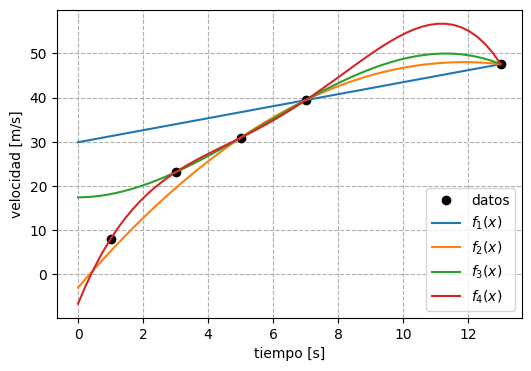

In [3]:
X = np.array([1, 3, 5, 7, 13])
Y = np.array([8, 23.1, 30.9, 39.4, 47.55])
x = np.linspace(0, 13, 55)

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(X, Y, 'ok', label='datos')
ax.plot(x, Lagrang(x, X[-2:], Y[-2:], 1), label=r'$f_1(x)$')
ax.plot(x, Lagrang(x, X[-3:], Y[-3:], 2), label=r'$f_2(x)$')
ax.plot(x, Lagrang(x, X[1:], Y[1:], 3), label=r'$f_3(x)$')
ax.plot(x, Lagrang(x, X, Y, 4), label=r"$f_4(x)$")
ax.set(xlabel='tiempo [s]', ylabel='velocidad [m/s]')
ax.grid(ls='--')
ax.legend()
plt.show()


### 2.2.3 Interpolaciones de Lagrange utilizando la librería `scipy`

#### 3.2.3.1 Interpolación de una función

Utilice polinomios de Lagrange de primer y segundo ordenes para evaluar el valor de $\ln{2}$, utilizando los datos siguientes:

<center>

| x | ln(x) |
|---|-------|
| 1 | 0     |
| 4 | 1.386294 |
| 6 | 1.791760 |

</center>

In [4]:
X = np.array([1, 4, 6])
Y = np.array([0, 1.386294, 1.791760])

print(f"valor real, ln(2) = {np.log(2)}")
print(f"Lagrange de scipy : {lagrange(X,Y)(2)}")

valor real, ln(2) = 0.6931471805599453
Lagrange de scipy : 0.5658440000000002


#### 3.2.3.2 Ajuste de datos

Utilice polinomios de Lagrange para interpolar datos de caida libre, para $t=10 \mathbf{s}$.

<center>

| tiempo [s] | velocidad [m/s] |
|---|-------|
| 1 | 8     |
| 3 | 23.1 |
| 5 | 30.9 |
| 7 | 39.4 |
| 13 | 47.55 |

</center>



In [5]:
X = np.array([1, 3, 5, 7, 13])
Y = np.array([8, 23.1, 30.9, 39.4, 47.55])

t = 10
print(f"Interpolación en t={t} : {lagrange(X,Y)(t)} m/s")

Interpolación en t=10 : 54.3019531250001 m/s
